# Question3 fixing

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

"""
# Only grab slices of the dataframes
for p in range(1,5):
    
    # The feature list will be used for the regression
    feature_list = [i for i in range(1,p+1)]
    
    # Run 100 simulations
    mse_list = list()
    for sim in range(100):
        
        mdf = pd.DataFrame(np.random.normal(size=(1100,p)), columns=pd.RangeIndex(start=1, stop=p+1))
        mdf['Y'] = 4*mdf[1] + np.random.normal()
        train_df = mdf.loc[:99,:]; test_df = mdf.loc[100:,:]
        
        # Fit the model from the training df
        X = train_df[feature_list]
        y = train_df.Y
        lm = LinearRegression()
        lm.fit(X,y)
        
        # Store the prediction into column 
        # Y_pred in the test df. Get the differences
        X_new = test_df[feature_list]
        test_df.loc[:,'Y_pred'] = lm.predict(X_new)
        test_df.loc[:,'Y_sqerr'] = (test_df.Y - test_df.Y_pred)**2
        #print(np.array(test_df.Y_sqerr).mean())
        mse_list.append(np.array(test_df.Y_sqerr).mean())
        
    print("average mse for p = %i: %d" % (p, np.array(mse_list).mean()))                  

"""

print("hi")

    

hi


ValueError: x and y must be the same size

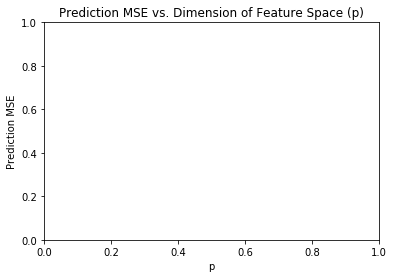

In [52]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

p_list = list()
avg_mse_list = list()
for p in range(1,81):
    
    p_list.append(p)
    mse_list = list()
    for i in range(100):

        # Build a train dataframe (100 obs)
        train_df = pd.DataFrame(np.random.normal(size=(100,p)), columns=pd.RangeIndex(start=1, stop=p+1))
        train_df['Y'] = 4*train_df[1] + np.random.normal(size=100)

        # Fit the linear model
        X = train_df[train_df.columns.tolist()[:-1]]
        y = train_df['Y']
        lm = LinearRegression()
        lm.fit(X,y)

        # Build the test dataframe (1000 obs)
        test_df = pd.DataFrame(np.random.normal(size=(1000,p)), columns=pd.RangeIndex(start=1, stop=p+1))
        test_df['Y'] = 4*test_df[1] + np.random.normal(size=1000)

        # Use the linear model to predict
        X_new = test_df[test_df.columns.tolist()[:-1]]
        test_df['Y_pred'] = lm.predict(X_new)
        test_df['Y_sqerr'] = (test_df.Y - test_df.Y_pred)**2

        # mse is average of Y_sqerr column
        mse = test_df.Y_sqerr.mean()

        # append to mse_list
        mse_list.append(mse)


    # get average mse over simulations
    avg_mse = np.array(mse_list).mean()

    # append to avg_mse_list
    avg_mse_list.append(avg_mse)
    
%matplotlib inline
plt.ylabel('Prediction MSE')
plt.xlabel('p')
plt.title('Prediction MSE vs. Dimension of Feature Space (p)')
plt.scatter(p_list, avg_mse_list)